# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [42]:
import Pkg; Pkg.add("Plots")

  Resolving package versions...
   Updating `C:\Users\Delta\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\Delta\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [7]:
using Clustering, CSV, DataFrames

## 讀取資料

In [8]:
data = CSV.read("s1-set.csv")

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:40
└ @ CSV C:\Users\Delta\.julia\packages\CSV\MKemC\src\CSV.jl:40


5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [10]:
X = Matrix(data[: , 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [13]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([678338.094017094 827823.6259904912 … 507818.3133903134 668304.6134453781; 829650.2735042735 235157.73692551506 … 175610.41595441595 878162.8949579832], [12, 12, 12, 12, 12, 12, 12, 12, 12, 12  …  15, 15, 1, 1, 15, 15, 15, 15, 15, 1], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.4339233730371094e8, 3.8885533082617188e9, 1.2994704320839844e9, 5.683797703144531e8, 2.783080929866699e9, 5.950350555136719e8, 7.549396860429688e8, 5.967683618413086e8, 5.092594316581055e9, 1.9991191816064453e8], [117, 631, 351, 339, 314, 334, 341, 340, 345, 357, 316, 297, 329, 351, 238], [117, 631, 351, 339, 314, 334, 341, 340, 345, 357, 316, 297, 329, 351, 238], 1.3301108862673352e13, 13, true)

In [14]:
data[:, :cluster] = string.(assignments(result))

5000-element Array{String,1}:
 "12"
 "12"
 "12"
 "12"
 "12"
 "12"
 "12"
 "12"
 "12"
 "12"
 "12"
 "12"
 "12"
 ⋮
 "15"
 "15"
 "15"
 "15"
 "1"
 "1"
 "15"
 "15"
 "15"
 "15"
 "15"
 "1"

In [15]:
data

5000×3 DataFrame
│ Row  │ x      │ y      │ cluster │
│      │ Int64  │ Int64  │ String  │
├──────┼────────┼────────┼─────────┤
│ 1    │ 664159 │ 550946 │ 12      │
│ 2    │ 665845 │ 557965 │ 12      │
│ 3    │ 597173 │ 575538 │ 12      │
│ 4    │ 618600 │ 551446 │ 12      │
│ 5    │ 635690 │ 608046 │ 12      │
│ 6    │ 588100 │ 557588 │ 12      │
│ 7    │ 582015 │ 546191 │ 12      │
│ 8    │ 604678 │ 574577 │ 12      │
│ 9    │ 572029 │ 518313 │ 12      │
│ 10   │ 604737 │ 574591 │ 12      │
⋮
│ 4990 │ 681053 │ 892766 │ 15      │
│ 4991 │ 683321 │ 873932 │ 15      │
│ 4992 │ 701017 │ 931252 │ 15      │
│ 4993 │ 645677 │ 814395 │ 1       │
│ 4994 │ 677362 │ 853471 │ 1       │
│ 4995 │ 659046 │ 930099 │ 15      │
│ 4996 │ 665426 │ 853940 │ 15      │
│ 4997 │ 691827 │ 863963 │ 15      │
│ 4998 │ 650661 │ 861267 │ 15      │
│ 4999 │ 599647 │ 858702 │ 15      │
│ 5000 │ 684091 │ 842566 │ 1       │

In [17]:
using Gadfly


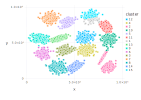

In [52]:
p = plot(data, x="x", y="y", color="cluster", Geom.point)

In [53]:
typeof(p)

Plot

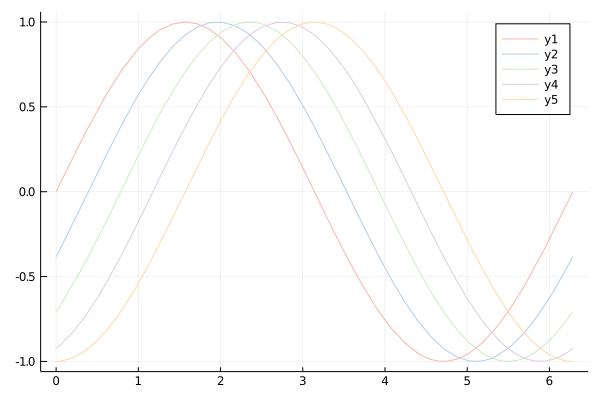

In [56]:
using Plots

Plots.plot(
    [x -> sin(x - a) for a in range(0, π / 2, length = 5)], 0, 2π;
    palette = :Pastel1_8,
)